# Imports

In [46]:
# libraries
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt

# our code
from _solver import DBSTSolverCP

# Degree (-Constrained) Bottleneck Spanning Tree

This combinatorial problem is a mix of two distinct spanning tree problems: The Bottleneck Spanning Tree (BST) problem and the Degree-constrained Minimum Spanning Tree (DCMST) problem. 

* BST asks for a spanning tree on a given undirected graph, which minimizes the cost of the 'longest' (most expensive) used edge. This problem is known to be easy, as a regular Minimum Spanning Tree (MST) is always also a BST.

* The k-DCMST problem asks for the cost-minimal spanning tree on a given undirected graph, such that every node in that graph has degree k or less. k-DCMST with k=2 is the well-known Hamiltonian Path problem, which is known to be NP-hard. But, the problem is known to also be NP-hard for k > 2.

Our problem simply unites the constraints from the BST and the k-DCMST problem. We want to find the smallest bottleneck cost while limiting the degrees of the resulting spanning tree (feel free to fiddle with that value k).

## Utils

In [47]:
def random_points(n, w=10_000, h=10_000):
    """
    Generate a list of n randomly placed points on the w x h grid.
    """
    return [(random.randint(0,w), random.randint(0,h)) for _ in range(n)]

def squared_distance(p1, p2):
    """
    Calculate the squared euclidian distance (in order to minimze the use of the sqrt() operation).
    """
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

def draw_dbst_edges(edges):
    """
    Draw the edges of a DBST. The bottleneck edge(s) automatically get highlighted.
    """
    points = set([e[0] for e in edges] + [e[1] for e in edges])
    draw_graph = nx.empty_graph()
    draw_graph.add_nodes_from(points)
    draw_graph.add_edges_from(edges)
    g_edges = draw_graph.edges()
    max_length = max((squared_distance(*e) for e in g_edges))
    color = [('red' if squared_distance(*e) == max_length else 'black') for e in g_edges]
    width = [(1.0 if squared_distance(*e) == max_length else 0.5) for e in g_edges]
    plt.clf()
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(8,8)
    ax.set_aspect(1.0)  # 1:1 aspect ratio
    nx.draw_networkx(draw_graph, pos={p: p for p in points}, node_size=8,
                     with_labels=False, edgelist=g_edges, edge_color=color, width=width, ax=ax)
    plt.show()

## Solve something

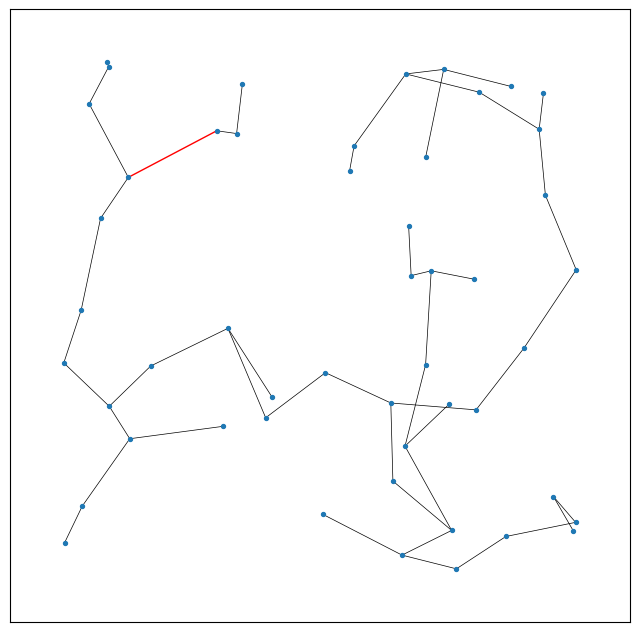

In [48]:
random.seed(1234567) # remove if you want random instances
solver = DBSTSolverCP(random_points(50), 3)
draw_dbst_edges(solver.solve())